In [18]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x_):
    return 1 / (1 + np.exp(-x_))


def sigmoid_grad(x_):
    return (1.0 - sigmoid(x_)) * sigmoid(x_)



def backward_layer(forward_pre_layer_after_active, 
                   backward_error_next_layer_before_active, 
                   weight, bias, batch, lr):
    weight_gradient = forward_pre_layer_after_active.T @ backward_error_next_layer_before_active
    bias_gradient = np.sum(backward_error_next_layer_before_active, axis=0) / batch
    error_pre_layer_before_active = backward_error_next_layer_before_active @ weight.T
    weight_step = weight - weight_gradient * lr
    bias_step = bias - bias_gradient * lr
    return weight_step, bias_step, error_pre_layer_before_active


def get_before_active(forward_before_active, backward_error_after):
    return sigmoid_grad(forward_before_active) * backward_error_after

def backward_layer_and_get_before_active(forward_pre_layer_before_active,
                                         forward_pre_layer_after_active, 
                                         backward_error_next_layer_before_active, 
                                         weight, bias, batch, lr):
    w,b,ep=backward_layer(forward_pre_layer_after_active, backward_error_next_layer_before_active, weight, bias, batch, lr)
    return w,b,get_before_active(forward_pre_layer_before_active,ep)

class BP:
    def __init__(self, input_size, hidden_size, output_size, batcH_size=100, learn_rate=0.02):
        self.in_layer = None
        self.hidden_layer_before_active = None
        self.hidden_layer = None
        self.out_layer = None
        self.batch_size = None
        self.weight_in_hid = np.random.rand(input_size, hidden_size)
        self.bias_hid = np.random.rand(hidden_size)
        self.weight_hid_out = np.random.rand(hidden_size, output_size)
        self.bias_out = np.random.rand(output_size)
        self.learn_rate = learn_rate

    def forward(self, data):
        self.batch_size = data.shape[0]
        self.in_layer = data
        self.hidden_layer_before_active = self.in_layer @ self.weight_in_hid + self.bias_hid
        self.hidden_layer = sigmoid(self.hidden_layer_before_active)
        self.out_layer = self.hidden_layer @ self.weight_hid_out + self.bias_out
        return self.out_layer

    def backward(self, label):
        loss = ((self.out_layer - label) * (self.out_layer - label)).mean()
        error_out = (self.out_layer - label)
#         self.weight_hid_out, self.bias_out, pre_after = backward_layer(
#             forward_pre_layer_after_active=self.hidden_layer  # 正向传播前一层激活后的值
#             , backward_error_next_layer_before_active=error_out  # 反向传播后一层激活前的值
#             , weight=self.weight_hid_out
#             , bias=self.bias_out
#             , batch=self.batch_size
#             , lr=self.learn_rate)
#         # 反向传播激活前
#         hidden_pre_before = get_before_active(
#             forward_before_active=self.hidden_layer_before_active  # 正向传播激活前
#             , backward_error_after=pre_after  # 反向传播激活后
#         )
        self.weight_hid_out, self.bias_out, hidden_pre_before = backward_layer_and_get_before_active(
            forward_pre_layer_before_active=self.hidden_layer_before_active,
            forward_pre_layer_after_active=self.hidden_layer  # 正向传播前一层激活后的值
            , backward_error_next_layer_before_active=error_out  # 反向传播后一层激活前的值
            , weight=self.weight_hid_out
            , bias=self.bias_out
            , batch=self.batch_size
            , lr=self.learn_rate
        )
        
        
        self.weight_in_hid, self.bias_hid, _ = backward_layer(
            forward_pre_layer_after_active=self.in_layer
            , backward_error_next_layer_before_active=hidden_pre_before
            , weight=self.weight_in_hid
            , bias=self.bias_hid
            , batch=self.batch_size
            , lr=self.learn_rate)
        return loss

    def train(self, data, label, step=10000):
        loss_array = []
        for i in range(step):
            self.forward(data)
            loss_array.append(self.backward(label))
        return np.array(loss_array)


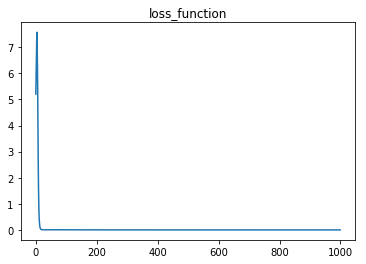

In [19]:
bp = BP(1, 4, 1)
data = np.linspace(-2, 2, 60)
data.shape = 60, 1
loss = bp.train(data, np.sin(data), step=1000)
plt.title('loss_function')
plt.plot(loss)
plt.show()

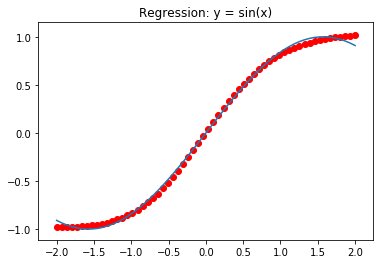

In [20]:
plt.plot(data, np.sin(data))
plt.scatter(data, bp.forward(data),color='r')
plt.title('Regression: y = sin(x)')
plt.show()

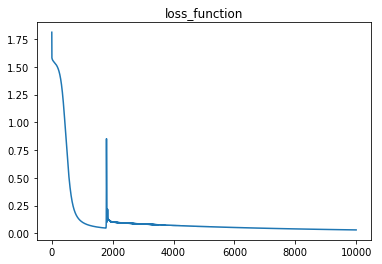

In [12]:
bp2 = BP(1, 4, 1,learn_rate=0.01)
data = np.linspace(-2, 2, 40)
data.shape = 40, 1
loss = bp2.train(data, data * data)
plt.title('loss_function')
plt.plot(loss)
plt.show()

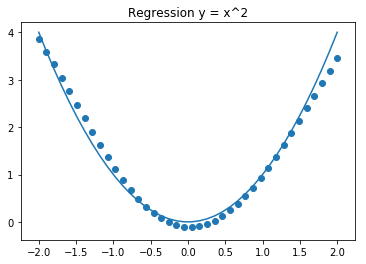

In [13]:
plt.plot(data, data * data)
plt.scatter(data, bp2.forward(data))
plt.title("Regression y = x^2")
plt.show()

In [14]:
bp3 = BP(2, 4, 1)
data = np.linspace(0, 2, 40)
data.shape = -1, 2
label = np.sum(data, axis=1)
label.shape = -1, 1
sequence = np.linspace(0, 20, 20)
loss = bp3.train(data, label, step=500)
print('x1',data[:,0])
print('x2',data[:,1])
# print('x1+x2',label)

x1 [0.         0.1025641  0.20512821 0.30769231 0.41025641 0.51282051
 0.61538462 0.71794872 0.82051282 0.92307692 1.02564103 1.12820513
 1.23076923 1.33333333 1.43589744 1.53846154 1.64102564 1.74358974
 1.84615385 1.94871795]
x2 [0.05128205 0.15384615 0.25641026 0.35897436 0.46153846 0.56410256
 0.66666667 0.76923077 0.87179487 0.97435897 1.07692308 1.17948718
 1.28205128 1.38461538 1.48717949 1.58974359 1.69230769 1.79487179
 1.8974359  2.        ]


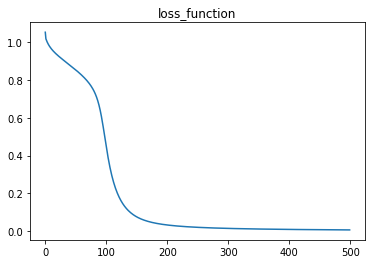

In [15]:
plt.title('loss_function')
plt.plot(loss)
plt.show()

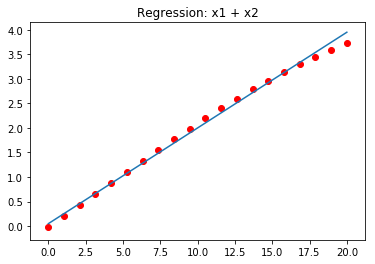

In [16]:
plt.plot(sequence, label)
plt.scatter(sequence, bp3.forward(data),color = 'r')
plt.title('Regression: x1 + x2')
plt.show()